In [1]:
import rdkit # compchem library
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.Chem.Draw import IPythonConsole # use this to draw molecules in the notebook
print(rdkit.__version__)

import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier

2024.09.3


Data for this exercise taken from the [DUD-E validation dataset](http://dude.docking.org/targets/try1).

In [2]:
def get_mols(smi_file):
    mols = []
    with open(smi_file) as f:
        for l in f:
            mols.append(l.split()[0])
    return mols

In [3]:
n = 200 # balance sets equally
actives = [ Chem.MolFromSmiles(m) for m in get_mols('./data/try1_actives_final.ism')[:n] ]
decoys = [ Chem.MolFromSmiles(m) for m in get_mols('./data/try1_decoys_final.ism')[:n] ]

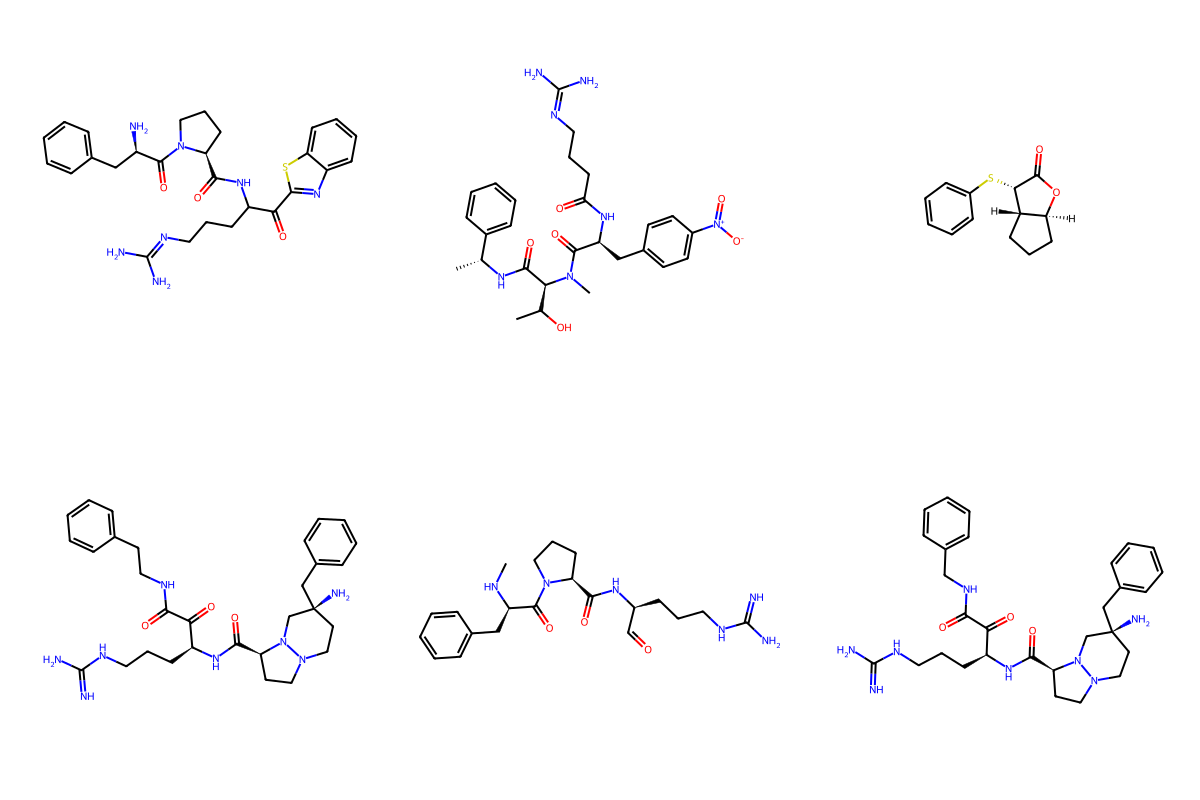

In [4]:
img = Draw.MolsToGridImage( actives[:6], molsPerRow=3, subImgSize=(400, 400))
img

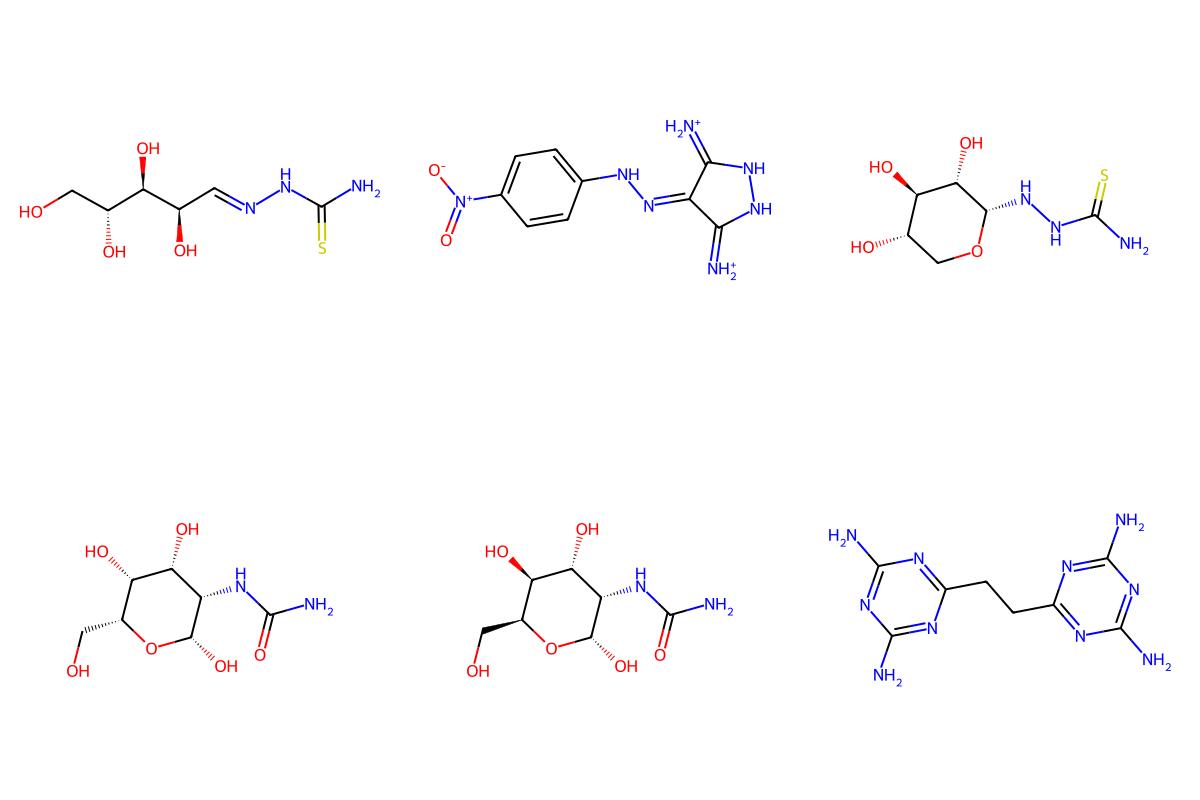

In [5]:
img = Draw.MolsToGridImage( decoys[:6], molsPerRow=3, subImgSize=(400, 400))
img

We need to generate properties for each molecule in the actives and decoy testing sets. <font color="red">Warning: This is sloppy programming!</font>

In [6]:
mol = pd.Series(decoys + actives)
target_classes = np.array(['DECOY', 'ACTIVE'])
mol_labels = pd.Series(([target_classes[0]] * n) + ([target_classes[1]] * n))
df = pd.DataFrame()
df['molecule'] = mol
df['class'] = mol_labels
df['heavy_atom_count'] = [ float(Descriptors.HeavyAtomCount(m)) for m in df['molecule'] ]
df['heteroatoms_count'] = [ float(Descriptors.NumHeteroatoms(m)) for m in df['molecule'] ]
df['mol_weight'] = [ Descriptors.MolWt(m) for m in df['molecule'] ]
df['rot_bonds'] =  [ float(Descriptors.NumRotatableBonds(m)) for m in df['molecule'] ]
df['h_donors'] =   [ float(Descriptors.NumHDonors(m)) for m in df['molecule'] ]
df['h_acceptors'] = [ float(Descriptors.NumHAcceptors(m)) for m in df['molecule'] ]
df['log_p'] = [ Descriptors.MolLogP(m) for m in df['molecule'] ]
df['balabanj'] = [ Descriptors.BalabanJ(m) for m in df['molecule'] ]
df['mol_mr'] = [ Descriptors.MolMR(m) for m in df['molecule'] ] # molar refractivity
df['ring_count'] = [ float(Descriptors.RingCount(m)) for m in df['molecule'] ]
df['ring_aromatic'] = [ float(Descriptors.NumAromaticRings(m)) for m in df['molecule'] ]
df['ring_saturated'] = [ float(Descriptors.NumSaturatedRings(m)) for m in df['molecule'] ]
df['ring_aliphatic'] = [ float(Descriptors.NumAliphaticRings(m)) for m in df['molecule'] ]
df['tpsa'] = [ Descriptors.TPSA(m) for m in df['molecule'] ]
df['chi0'] = [ Descriptors.Chi0(m) for m in df['molecule'] ]
df['chi1'] = [ Descriptors.Chi1(m) for m in df['molecule'] ]
df['nhoh'] = [ float(Descriptors.NHOHCount(m)) for m in df['molecule'] ]
df['no'] = [ float(Descriptors.NOCount(m)) for m in df['molecule'] ]
#df['amide_bonds'] = [ Descriptors.NumAmideBonds(m) for m in df['molecule'] ]
df['csp3'] = [ Descriptors.FractionCSP3(m) for m in df['molecule'] ]
df['hallkieralpha'] = [ Descriptors.HallKierAlpha(m) for m in df['molecule'] ]
df['ipc'] = [ Descriptors.Ipc(m) for m in df['molecule'] ]
df['bertzct'] = [ Descriptors.BertzCT(m) for m in df['molecule'] ]
df['qed'] = [ Descriptors.qed(m) for m in df['molecule'] ]
df['kappa1'] = [ Descriptors.Kappa1(m) for m in df['molecule'] ]
df['kappa2'] = [ Descriptors.Kappa2(m) for m in df['molecule'] ]
df['kappa3'] = [ Descriptors.Kappa3(m) for m in df['molecule'] ]
df

,molecule,class,heavy_atom_count,heteroatoms_count,mol_weight,rot_bonds,h_donors,h_acceptors,log_p,balabanj,...,nhoh,no,csp3,hallkieralpha,ipc,bertzct,qed,kappa1,kappa2,kappa3
0,<rdkit.Chem.rdchem.Mol object at 0x7339b1824580>,DECOY,14.0,8.0,223.254,5.0,6.0,6.0,-3.11960,3.993830,...,7.0,7.0,0.666667,-0.80,8.634210e+02,213.253298,0.165010,13.200000,6.623823,5.043490
1,<rdkit.Chem.rdchem.Mol object at 0x7339b18244a0>,DECOY,18.0,9.0,249.234,3.0,5.0,4.0,-3.21430,2.103874,...,7.0,9.0,0.000000,-2.97,1.428210e+04,530.539508,0.282776,11.513498,4.491161,2.237596
2,<rdkit.Chem.rdchem.Mol object at 0x7339b1824510>,DECOY,14.0,8.0,223.254,2.0,6.0,6.0,-3.23680,2.422963,...,7.0,7.0,0.833333,-0.51,1.140633e+03,217.253298,0.213402,11.564129,4.823127,2.737778
3,<rdkit.Chem.rdchem.Mol object at 0x7339b18245f0>,DECOY,15.0,8.0,222.197,2.0,6.0,6.0,-3.54540,2.697922,...,7.0,8.0,0.857143,-0.93,1.738804e+03,237.520300,0.285119,12.141073,4.727106,2.548368
4,<rdkit.Chem.rdchem.Mol object at 0x7339b18246d0>,DECOY,15.0,8.0,222.197,2.0,6.0,6.0,-3.54540,2.697922,...,7.0,8.0,0.857143,-0.93,1.738804e+03,237.520300,0.285119,12.141073,4.727106,2.548368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,<rdkit.Chem.rdchem.Mol object at 0x7339b182a420>,ACTIVE,39.0,6.0,519.645,11.0,3.0,4.0,5.40077,1.586668,...,4.0,6.0,0.181818,-4.71,6.302892e+08,1403.335105,0.140140,27.328155,13.194243,7.417010
396,<rdkit.Chem.rdchem.Mol object at 0x7339b182a490>,ACTIVE,37.0,7.0,494.643,7.0,3.0,5.0,5.43844,1.366094,...,4.0,7.0,0.300000,-4.13,3.073328e+08,1447.741313,0.235065,24.559389,10.465533,5.354944
397,<rdkit.Chem.rdchem.Mol object at 0x7339b182a500>,ACTIVE,35.0,10.0,494.573,7.0,3.0,7.0,2.56277,1.546048,...,5.0,9.0,0.200000,-3.57,7.191928e+07,1358.279963,0.259564,24.551286,9.964360,5.409403
398,<rdkit.Chem.rdchem.Mol object at 0x7339b182a570>,ACTIVE,36.0,11.0,507.572,8.0,4.0,7.0,2.43337,1.532234,...,6.0,10.0,0.160000,-4.06,1.111411e+08,1453.671519,0.269430,25.045501,9.895917,5.126224


In [7]:
features = df.columns[2:]
# View features names
features

Index(['heavy_atom_count', 'heteroatoms_count', 'mol_weight', 'rot_bonds',
       'h_donors', 'h_acceptors', 'log_p', 'balabanj', 'mol_mr', 'ring_count',
       'ring_aromatic', 'ring_saturated', 'ring_aliphatic', 'tpsa', 'chi0',
       'chi1', 'nhoh', 'no', 'csp3', 'hallkieralpha', 'ipc', 'bertzct', 'qed',
       'kappa1', 'kappa2', 'kappa3'],
      dtype='object')

In [8]:
y = np.array([1 if cls == "ACTIVE" else 0 for cls in df['class']])
target_names = np.array(["ACTIVE", "DECOY"])

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def nd_pca(data, dim):
    pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=dim))])
    X_t = pipeline.fit_transform(data)    
    print('explained variance ratio (first two components): %s' % str(pipeline.named_steps['pca'].explained_variance_ratio_))
    return X_t

explained variance ratio (first two components): [0.47301537 0.19583274]


<module 'pylab' from '/opt/conda/envs/py312/lib/python3.13/site-packages/pylab.py'>

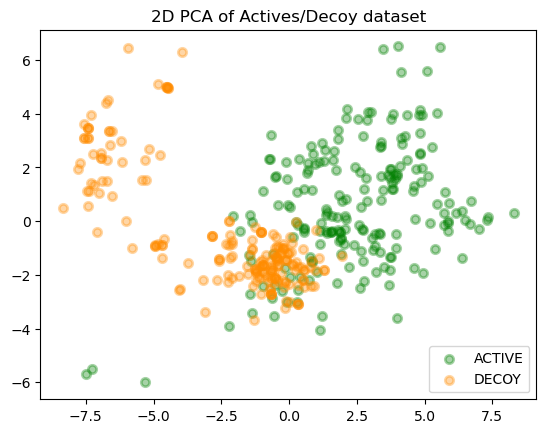

In [10]:
X = df[features]
X_t_2d = nd_pca(X, 2)

import pylab as plt
plt.figure()
colors = ['green', 'darkorange']
lw = 2
for color, i, target_name in zip(colors, [1, 0], target_names):
    plt.scatter(X_t_2d[y == i, 0], X_t_2d[y == i, 1], color=color, alpha=.35, lw=lw, label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('2D PCA of Actives/Decoy dataset')
plt

In [11]:
X = df[features]
X_t_3d = nd_pca(X, 3)

explained variance ratio (first two components): [0.47301537 0.19583274 0.11029992]


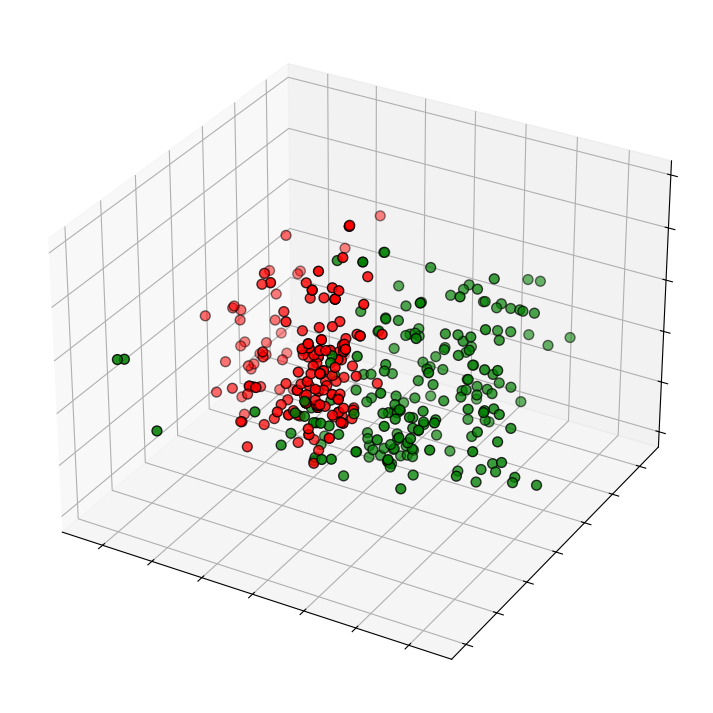

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -2], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(12, 9))
plt.clf()
ax = fig.add_subplot(projection='3d')


# Reorder the labels to have colors matching the cluster results
y = np.array(['g' if cls == "ACTIVE" else 'r' for cls in df['class']])
ax.scatter(X_t_3d[:, 0], X_t_3d[:, 1], X_t_3d[:, 2], c=y, s=50, edgecolor='k')

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()

# Practical Tasks

* How would you use PCA (dimensionality reduction) in an ML model?